<a href="https://colab.research.google.com/github/NamSee04/JupiterNotebook/blob/main/stable_diffusion_xl_base_1_0/stable_diffusion_xl_base_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
pip install optimum-intel openvino diffusers onnx


In [2]:
from optimum.intel.openvino.modeling_diffusion import OVStableDiffusionPipeline

pipeline = OVStableDiffusionPipeline.from_pretrained(
    "rupeshs/sdxs-512-0.9-openvino",
    ov_config={"CACHE_DIR": ""},
)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/590 [00:00<?, ?B/s]

Fetching 20 files:   0%|          | 0/20 [00:00<?, ?it/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/728 [00:00<?, ?B/s]

tokenizer/added_tokens.json:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

text_encoder/openvino_model.xml:   0%|          | 0.00/1.20M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/121 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/916 [00:00<?, ?B/s]

openvino_model.bin:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.93k [00:00<?, ?B/s]

unet/openvino_model.xml:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

vae_decoder/config.json:   0%|          | 0.00/765 [00:00<?, ?B/s]

vae_decoder/openvino_model.xml:   0%|          | 0.00/339k [00:00<?, ?B/s]

openvino_model.bin:   0%|          | 0.00/1.31G [00:00<?, ?B/s]

openvino_model.bin:   0%|          | 0.00/198M [00:00<?, ?B/s]

vae_encoder/openvino_model.xml:   0%|          | 0.00/286k [00:00<?, ?B/s]

openvino_model.bin:   0%|          | 0.00/137M [00:00<?, ?B/s]

You have disabled the safety checker for <class 'optimum.intel.openvino.modeling_diffusion.OVStableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [11]:
prompt = "A cute cat"

images = pipeline(
    prompt=prompt,
    width=512,
    height=512,
    num_inference_steps=1,
    guidance_scale=1.0,
).images
images[0].save("out_image.png")

  0%|          | 0/1 [00:00<?, ?it/s]

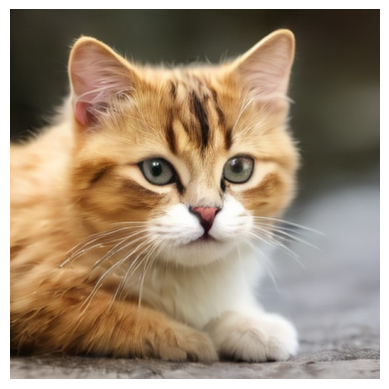

In [12]:


import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO


init_image = Image.open("/content/out_image.png").convert("RGB")
init_image = init_image.resize((521, 521))


plt.imshow(init_image)
plt.axis('off')
plt.show()

